# **Machine Learning (Python) M2 GRA**
François Pedeboy (francois.pedeboy@etud.univ-evry.fr) and Youssef Louraoui (20230348@etud.univ-evry.fr)
Instructor: A. Bousabaa (abdelkader.bousabaa@univ-evry.fr)

## **Preparation of the Working Environment on Python**

Below, we detail the essential Python packages that constitute the basis of the machine learning project.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# The specific packages for running the machine learning models

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D, LSTM
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [21]:
# We start by importing the datasets from CSV file

df_data = pd.read_csv("/Users/youssef/Library/CloudStorage/OneDrive-UniversiteEvryVald'Essonne/Google Drive/Mon Drive/Saclay/M2GRA files/M2GRAS2/Machine Learning in Python - A. Bousabaa/data_stocks.csv")

# NB: ensure the data file path is well configured to run the script. 

# This is a time series covering S&P500 data of 41265 data points overall.

df_data["DATE"] = pd.to_datetime(df_data["DATE"], unit='s')

# We eliminate the columns that will not be used in the script

list_col = list(df_data.columns)
list_col.remove("DATE")
list_col.remove("SP500")

# We isolate the S&P500 index into a dataframe for better handling

df_stocks = df_data.drop('SP500', axis=1)
df_sp500 = df_data[['SP500']].copy()

In [22]:
# We have a look at the different equities that are in the dataset and that we want to use a predictors for the analysis

print(df_data[list_col].info())
print(df_data[list_col].describe())
print(df_data[list_col].head())

# We have a look at the data from the S&P500 index benchmark

print(df_sp500.info())
print(df_sp500.describe())
print(df_sp500.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41266 entries, 0 to 41265
Columns: 500 entries, NASDAQ.AAL to NYSE.ZTS
dtypes: float64(500)
memory usage: 157.4 MB
None
         NASDAQ.AAL   NASDAQ.AAPL  NASDAQ.ADBE    NASDAQ.ADI    NASDAQ.ADP  \
count  41266.000000  41266.000000  41266.00000  41266.000000  41266.000000   
mean      47.708346    150.453566    141.31793     79.446873    103.480398   
std        3.259377      6.236826      6.91674      2.000283      4.424244   
min       40.830000    140.160000    128.24000     74.800000     95.870000   
25%       44.945400    144.640000    135.19500     78.030000    101.300000   
50%       48.360000    149.945000    142.26000     79.410000    102.440000   
75%       50.180000    155.065000    147.10000     80.580000    104.660000   
max       54.475000    164.510000    155.33000     90.440000    121.770000   

        NASDAQ.ADSK   NASDAQ.AKAM   NASDAQ.ALXN   NASDAQ.AMAT    NASDAQ.AMD  \
count  41266.000000  41266.000000  41266.000000 

In [23]:
# Returns for the SP500 index and the underlying equities

arith_returns = df_data[list_col].pct_change().dropna()
SP500_return = df_sp500.pct_change().dropna()

# Analysis of the statistical performance of the S&P500 benchmark index

print(SP500_return.head())
print(SP500_return.describe())

# Analysis of the statistical performance of the equities in the dataset

print(arith_returns.head())
print(arith_returns.describe())

      SP500
1  0.000207
2 -0.000601
3  0.000690
4  0.000228
5  0.000326
              SP500
count  41265.000000
mean       0.000001
std        0.000225
min       -0.007615
25%       -0.000082
50%        0.000000
75%        0.000086
max        0.010656
   NASDAQ.AAL  NASDAQ.AAPL  NASDAQ.ADBE  NASDAQ.ADI  NASDAQ.ADP  NASDAQ.ADSK  \
1    0.000709     0.000139     0.005323    0.000488   -0.000880     0.005046   
2   -0.001180    -0.000069    -0.000729   -0.000609    0.000710    -0.001635   
3    0.001418    -0.000349    -0.001168   -0.000366   -0.000709    -0.000267   
4    0.003960     0.000139    -0.001483    0.000427   -0.000783     0.002490   
5    0.000049     0.000835     0.001463    0.000061   -0.000196     0.002566   

   NASDAQ.AKAM  NASDAQ.ALXN  NASDAQ.AMAT  NASDAQ.AMD  ...  NYSE.WYN  NYSE.XEC  \
1     0.001339    -0.000329     0.000513    0.006845  ...  0.000000  0.000000   
2    -0.000752     0.003704    -0.002563   -0.004759  ...  0.002548  0.001890   
3    -0.002927    -0.004

In [24]:
print(arith_returns.describe())
summary_stat_ret = arith_returns.describe()

         NASDAQ.AAL   NASDAQ.AAPL   NASDAQ.ADBE    NASDAQ.ADI    NASDAQ.ADP  \
count  41265.000000  41265.000000  41265.000000  4.126500e+04  41265.000000   
mean       0.000002      0.000003      0.000005  7.861464e-07      0.000001   
std        0.000902      0.000622      0.000607  7.808259e-04      0.000696   
min       -0.055388     -0.024031     -0.034190 -1.837270e-02     -0.049707   
25%       -0.000377     -0.000206     -0.000209 -2.567394e-04     -0.000193   
50%        0.000000      0.000000      0.000000  0.000000e+00      0.000000   
75%        0.000388      0.000211      0.000213  2.555911e-04      0.000195   
max        0.041710      0.063046      0.029026  4.941038e-02      0.020704   

        NASDAQ.ADSK   NASDAQ.AKAM   NASDAQ.ALXN   NASDAQ.AMAT    NASDAQ.AMD  \
count  41265.000000  41265.000000  41265.000000  41265.000000  4.126500e+04   
mean       0.000008     -0.000005      0.000004      0.000004 -9.345549e-07   
std        0.001097      0.001028      0.001136    

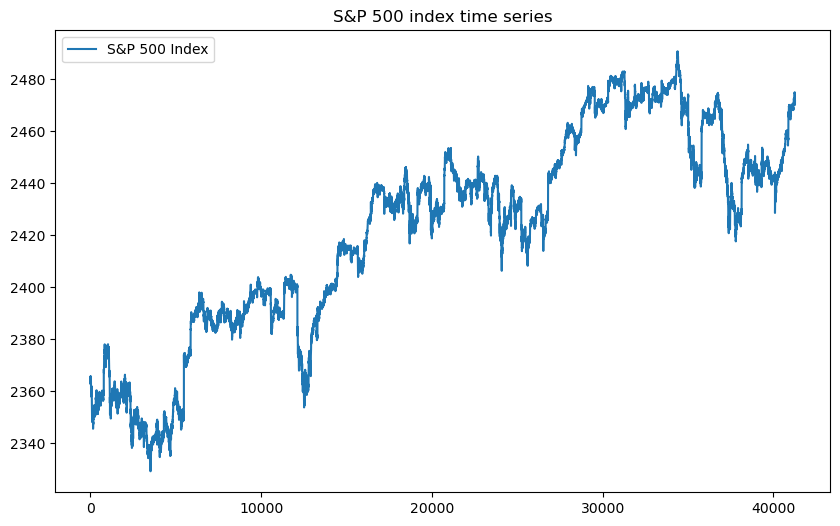

In [25]:
# We plot the SP500 price level

plt.figure(figsize=(10, 6))
plt.plot(df_sp500, label='S&P 500 Index')
plt.title('S&P 500 index time series')
plt.legend()
plt.show()

<Figure size 1000x600 with 0 Axes>

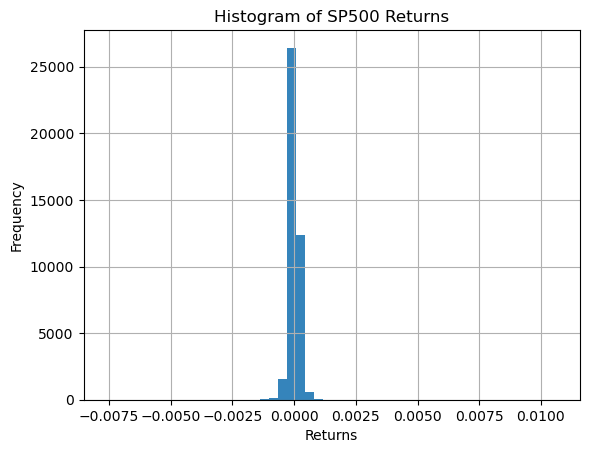

In [26]:
# Calculation of the histogram analysis of SP500 returns

plt.figure(figsize=(10, 6))
SP500_return.hist(bins=50, alpha=0.9)
plt.title(f"Histogram of SP500 Returns")
plt.xlabel("Returns")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

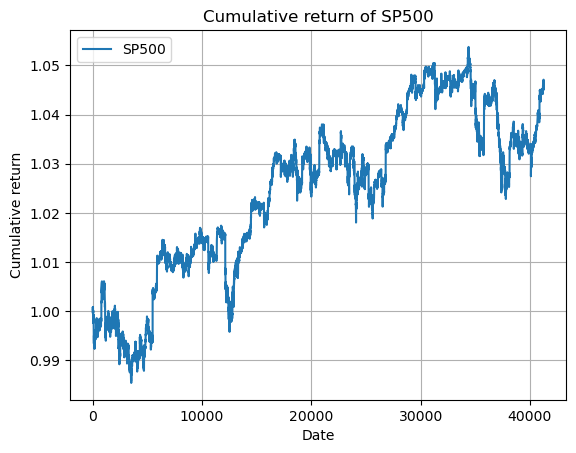

In [27]:
# Calculation of the cumulative returns for the SP500 index

SP500_cumulative_return = (1 + SP500_return).cumprod()

SP500_cumulative_return.plot(title=f"Cumulative return of SP500")
plt.xlabel("Date")
plt.ylabel("Cumulative return")
plt.grid(True)
plt.show()

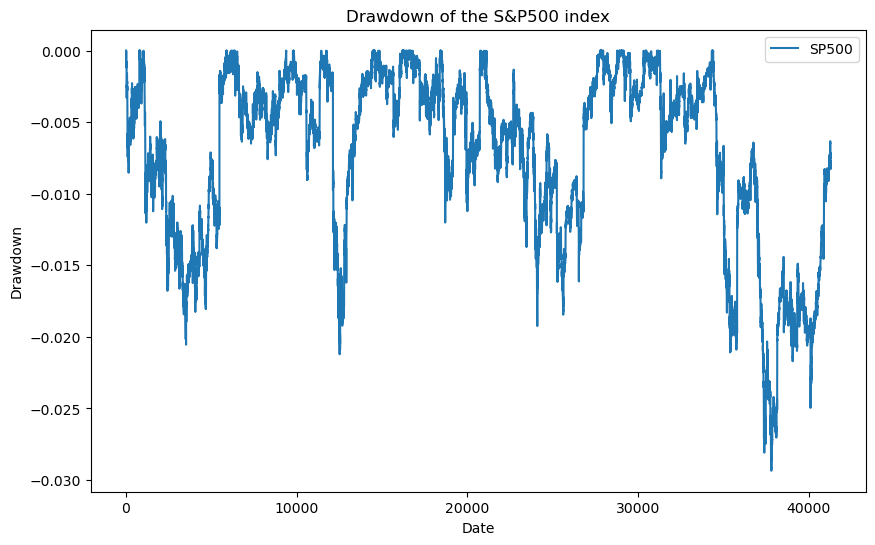

In [72]:
# Calculate the cumulative return of the S&P500 index 

SP500_cumulative_returns = (1 + SP500_return).cumprod()

# Calculate the drawdown of the S&P500 index over the analysed period

drawdown = SP500_cumulative_returns.div(SP500_cumulative_returns.cummax()).subtract(1)

drawdown.plot(figsize=(10, 6))
plt.title('Drawdown of the S&P500 index')
plt.ylabel('Drawdown')
plt.xlabel('Date')
plt.show()

* In order to perform the forecast and run the different machine learning techniques, we first start by handling the dataset, cleaning any missing observations or data that could biais the model output in order to offer better insights. 

* After importing the dataset of S\&P500 data covering 41265 observations with its underlying stocks, we made a preliminary analysis of the return profile and characteristics. 

* From the preliminary analysis of the dataset, we filtered the column into seconds to better interpret the date column. 

* From the figure on S&P500 price level, we can see that the S\&P500 was evolving in an uptrend. The data starts at roughly 2360 and finishes above this level reaching the 2480 price level, representing a increase of 5.08\% across the period analysed. 

* From the drawdown plot for the index, we can see that the index losses where fluctuating in a narrow corridor of zero and nearly 3\% during that period. 

* Looking at the histogram, we can see that the returns are all close to zero. This means that during this trading day, the price of the S\&P 500 did not fluctuate much and stayed around zero. It is normal for a very liquid market index like the S\&P 500 to be centred around the mean. This is because price changes are usually small when looked at over short periods of time. We can therefore assume there was no big economic or news events that impact the index level. The distribution is leptokurtic and shows that extreme returns, both positive and negative, happen less often but are still there. These outliers are times when prices suddenly go up or down. This could be because of events happening in real time or big trades happening during the day. Also, the fact that the histogram is symmetric around the centre axis shows that the S\&P 500's price went up and down almost equally many times during the period. It is worth mentioning that the histogram only shows how often returns happen, but not how big they are. The effect on an investor's portfolio could be very different based on the size of the returns, even if the amount of positive and negative returns is equal.

* In terms of cumulative return, the S\&P500 index managed to roughly make around 5\% over the analysed period. 

In [28]:
# Scaling of the dataset to better handle the modeling of the machine learning programs

scaler = MinMaxScaler()
x = df_data[list_col]
y = df_data["SP500"]

X_train_df, X_test_df, Y_train_df, Y_test_df = train_test_split(x, y, train_size=0.7, shuffle=False)
X_train, X_test, Y_train, Y_test = X_train_df.to_numpy(), X_test_df.to_numpy(), Y_train_df.to_numpy(), Y_test_df.to_numpy()

## **1. Implementation of MLP and LSTM models on S&P500 data**

### 1.1 Deconstruction of the training sets

In [29]:
df_train = df_sp500[df_sp500.index < Y_test_df.index[0]]
df_test = df_sp500[df_sp500.index >= Y_test_df.index[0]]

train = df_train['SP500'].values
test = df_test['SP500'].values

training_values = scaler.fit_transform(train.reshape(-1, 1))

x_train = training_values[0:len(training_values)-250]
y_train = training_values[250:len(training_values)]

test_values = scaler.transform(test.reshape(-1, 1))

### 1.2 Implementation of an MLP model

In [30]:
# MLP model structure

model_MLP_SP500 = Sequential()
model_MLP_SP500.add(Dense(2048, activation='relu'))
model_MLP_SP500.add(Dense(512, activation='relu'))
model_MLP_SP500.add(Dense(128, activation='relu'))
model_MLP_SP500.add(Dropout(0.25))
model_MLP_SP500.add(Dense(32, activation='relu'))
model_MLP_SP500.add(Dense(8, activation='relu'))
model_MLP_SP500.add(Dense(4, activation='relu'))
model_MLP_SP500.add(Dense(1))

In [31]:
# Parametrization of the MLP model (optimizer, loss type)

model_MLP_SP500.compile(loss='mean_squared_error', optimizer='adam')

In [32]:
# Calibration of the MLP model parameters

model_MLP_SP500.fit(x_train, y_train, epochs=10, batch_size=16)

Epoch 1/10
1790/1790 [==============================] - 23s 12ms/step - loss: 0.0060
Epoch 2/10
1790/1790 [==============================] - 23s 13ms/step - loss: 0.0040
Epoch 3/10
1790/1790 [==============================] - 22s 13ms/step - loss: 0.0037
Epoch 4/10
1790/1790 [==============================] - 21s 12ms/step - loss: 0.0036
Epoch 5/10
1790/1790 [==============================] - 21s 12ms/step - loss: 0.0035
Epoch 6/10
1790/1790 [==============================] - 21s 12ms/step - loss: 0.0034
Epoch 7/10
1790/1790 [==============================] - 21s 12ms/step - loss: 0.0033
Epoch 8/10
1790/1790 [==============================] - 21s 12ms/step - loss: 0.0033
Epoch 9/10
1790/1790 [==============================] - 21s 11ms/step - loss: 0.0033
Epoch 10/10
1790/1790 [==============================] - 21s 12ms/step - loss: 0.0033


In [33]:
# We perform a prediction of the model for the S&P500 index

price_MLP_SP500 = model_MLP_SP500.predict(test_values)
price_MLP_SP500 = scaler.inverse_transform(price_MLP_SP500)
price_MLP_SP500 = np.squeeze(price_MLP_SP500.reshape(1,-1))
price_MLP_SP500

387/387 [==============================] - 2s 3ms/step


array([2459.142 , 2459.257 , 2458.9468, ..., 2460.4397, 2462.171 ,
       2462.171 ], dtype=float32)

### 1.3 Implementation of the LSTM model

In [34]:
#Implementation of LSTM model

model_LSTM_SP500 = Sequential()
model_LSTM_SP500.add(LSTM(128, return_sequences=True, input_shape=(None,1)))
model_LSTM_SP500.add(LSTM(64, return_sequences=False))
model_LSTM_SP500.add(Dropout(0.25))
model_LSTM_SP500.add(Dense(25, activation='relu'))
model_LSTM_SP500.add(Dense(1))

In [35]:
# We arrange the parameters (optimizer, loss)
model_LSTM_SP500.compile(optimizer='adam', loss='mean_squared_error')

In [36]:
# Calibration of LSTM
model_LSTM_SP500.fit(x_train, y_train,epochs=10, batch_size=16)

Epoch 1/10
1790/1790 [==============================] - 12s 4ms/step - loss: 0.0103
Epoch 2/10
1790/1790 [==============================] - 9s 5ms/step - loss: 0.0039
Epoch 3/10
1790/1790 [==============================] - 10s 5ms/step - loss: 0.0038
Epoch 4/10
1790/1790 [==============================] - 9s 5ms/step - loss: 0.0038
Epoch 5/10
1790/1790 [==============================] - 8s 5ms/step - loss: 0.0038
Epoch 6/10
1790/1790 [==============================] - 8s 4ms/step - loss: 0.0037
Epoch 7/10
1790/1790 [==============================] - 8s 4ms/step - loss: 0.0037
Epoch 8/10
1790/1790 [==============================] - 8s 4ms/step - loss: 0.0037
Epoch 9/10
1790/1790 [==============================] - 7s 4ms/step - loss: 0.0037
Epoch 10/10
1790/1790 [==============================] - 7s 4ms/step - loss: 0.0038


In [37]:
# Predictions for LSTM

price_LSTM_SP500 = model_LSTM_SP500.predict(test_values)
price_LSTM_SP500 = scaler.inverse_transform(price_LSTM_SP500)
price_LSTM_SP500 = np.squeeze(price_LSTM_SP500)
price_LSTM_SP500

387/387 [==============================] - 2s 2ms/step


array([2459.4216, 2459.4912, 2459.303 , ..., 2460.1997, 2461.2073,
       2461.2073], dtype=float32)

In [38]:
# Results of the implemented models in a dataframe

results_SP500_prediction = pd.DataFrame({'Real_price_SP500': Y_test, 'Pred_MLP_SP500': price_MLP_SP500, 'Pred_LSTM_SP500': price_LSTM_SP500})
results_SP500_prediction.head(n=5)

,Real_price_SP500,Pred_MLP_SP500,Pred_LSTM_SP500
0,2468.9099,2459.142090,2459.421631
1,2469.0100,2459.257080,2459.491211
2,2468.7400,2458.946777,2459.302979
3,2468.9500,2459.187988,2459.449463
4,2469.4099,2459.718750,2459.769287


<Axes: >

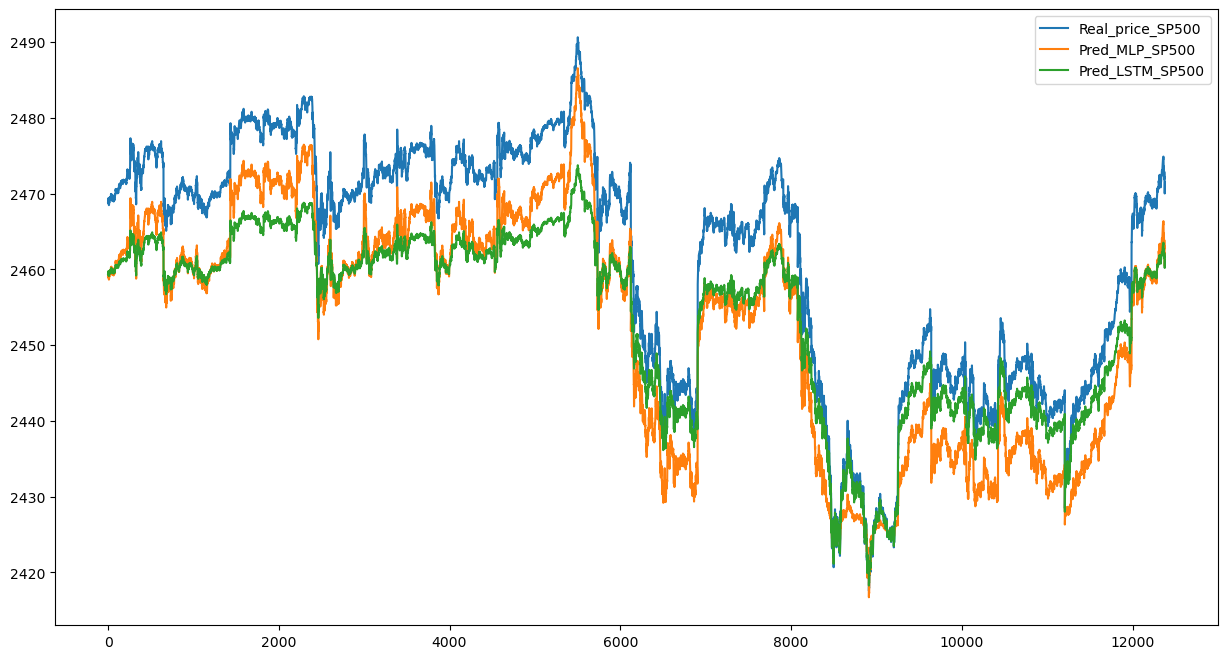

In [39]:
# Plotting the predictions against actual S&P500 prices for MLP and LSTM

results_SP500_prediction['Real_price_SP500'].plot(legend='Real price S&P500', figsize=(15,8))
results_SP500_prediction['Pred_MLP_SP500'].plot(legend='Forecast MLP')
results_SP500_prediction['Pred_LSTM_SP500'].plot(legend='Forecast LSTM')

The table below presents the results of the model in terms of Mean Average Error (MAE), Mean Squared Error (MSE) and Root Mean Squared Error (RMSE). For the statistical analysis, these metrics can be analysed on the following basis. Regarding the MAE, it measures the average size of the errors in a set of forecasts, without considering the direction of errors. It's the average over the test sample of the absolute differences between prediction and actual observation where all individual differences have equal weight. For the MSE, it is the average of the squares of the errors. This will mechanically place a higher weight on larger errors. This is because the squaring of each difference magnifies the impact of larger differences. RMSE is the square root of MSE and represents the sample standard deviation of the differences between predicted values and observed values. Across all the metrics, the lower the value, the better the result.\newline

The results obtained for both MLP and LSTM are close enough and the differences are marginal. The LSTM performs slightly better across the three performance metrics 

In [40]:
# Computation of the mean absolut error (MAE):

MAE_pred_MLP_SP500 = mean_absolute_error(results_SP500_prediction['Real_price_SP500'], results_SP500_prediction['Pred_MLP_SP500'])
MAE_pred_LSTM_SP500 = mean_absolute_error(results_SP500_prediction['Real_price_SP500'], results_SP500_prediction['Pred_LSTM_SP500'])
print("MAE for the forecasted MLP model:", MAE_pred_MLP_SP500)
print("MAE for the forecasted LSTM model:", MAE_pred_LSTM_SP500)

# Computation of the mean squared error (MSE):

MSE_pred_MLP_SP500 = mean_squared_error(results_SP500_prediction['Real_price_SP500'], results_SP500_prediction['Pred_MLP_SP500'])
MSE_pred_LSTM_SP500 = mean_squared_error(results_SP500_prediction['Real_price_SP500'], results_SP500_prediction['Pred_LSTM_SP500'])
print("MSE obtained for the forecasted MLP model:", MSE_pred_MLP_SP500)
print("MSE for the forecasted LSTM model:", MSE_pred_LSTM_SP500)

# Computation of the root mean squared error (RMSE):

RMSE_pred_MLP_SP500 = np.sqrt(MSE_pred_MLP_SP500)
RMSE_pred_LSTM_SP500 = np.sqrt(MSE_pred_LSTM_SP500)
print("RMSE obtained for the forecasted MLP model:", RMSE_pred_MLP_SP500)
print("RMSE for the forecasted LSTM model:", RMSE_pred_LSTM_SP500)

MAE for the forecasted MLP model: 8.710551679845265
MAE for the forecasted LSTM model: 7.884710131859602
MSE obtained for the forecasted MLP model: 79.89175192062332
MSE for the forecasted LSTM model: 78.40902288675687
RMSE obtained for the forecasted MLP model: 8.938218610026459
RMSE for the forecasted LSTM model: 8.854886949405785


# **2. Implementation of MLP and CNN on equities**

### 2.1 MLP applied to the underlying equities

We implement MLP and CNN models in order to predict the underlying stocks of the dataset, the 500 stocks that compose the S&P500 index.  

In [41]:
data_train = scaler.fit_transform(X_train)
data_test = scaler.transform(X_test)

We implement the MLP on the underlying stocks

In [42]:
model_MLP_stocks = Sequential()
model_MLP_stocks.add(Flatten(input_shape = (500,)))
model_MLP_stocks.add(Dense(2048, activation='relu'))
model_MLP_stocks.add(Dense(512, activation='relu'))
model_MLP_stocks.add(Dropout(0.25))
model_MLP_stocks.add(Dense(128, activation='relu'))
model_MLP_stocks.add(Dense(32, activation='relu'))
model_MLP_stocks.add(Dense(8, activation='relu'))
model_MLP_stocks.add(Dense(4, activation='relu'))
model_MLP_stocks.add(Dense(1))

In [43]:
model_MLP_stocks.compile(loss='mean_squared_error', optimizer='adam')

In [44]:
model_MLP_stocks.fit(X_train, Y_train, epochs=10, batch_size=16)

Epoch 1/10
1806/1806 [==============================] - 41s 20ms/step - loss: 40598.8242
Epoch 2/10
1806/1806 [==============================] - 37s 20ms/step - loss: 10465.2285
Epoch 3/10
1806/1806 [==============================] - 31s 17ms/step - loss: 5146.2051
Epoch 4/10
1806/1806 [==============================] - 28s 16ms/step - loss: 3606.6130
Epoch 5/10
1806/1806 [==============================] - 27s 15ms/step - loss: 3552.6750
Epoch 6/10
1806/1806 [==============================] - 27s 15ms/step - loss: 3572.4597
Epoch 7/10
1806/1806 [==============================] - 27s 15ms/step - loss: 3179.9529
Epoch 8/10
1806/1806 [==============================] - 26s 14ms/step - loss: 2260.2056
Epoch 9/10
1806/1806 [==============================] - 25s 14ms/step - loss: 2083.4985
Epoch 10/10
1806/1806 [==============================] - 26s 15ms/step - loss: 1777.4025


In [45]:
price_MLP_stocks = model_MLP_stocks.predict(X_test)
price_MLP_stocks = price_MLP_stocks.reshape(1,-1)[0]
price_MLP_stocks

387/387 [==============================] - 2s 4ms/step


array([1883.1646, 1883.3484, 1883.4004, ..., 1861.2065, 1860.1271,
       1861.1611], dtype=float32)

### 2.2 CNN applied to the underlying equities

In [46]:
model_CNN_stocks = Sequential()
model_CNN_stocks.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(500, 1)))
model_CNN_stocks.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model_CNN_stocks.add(MaxPooling1D(pool_size=2))
model_CNN_stocks.add(Dropout(0.25))
model_CNN_stocks.add(Flatten()) 
model_CNN_stocks.add(Dense(128, activation='relu'))
model_CNN_stocks.add(Dense(1))

In [47]:
# Parameter specification to run the CNN model

model_CNN_stocks.compile(loss='mean_squared_error', optimizer='adam')

In [48]:
# Calibration of the CNN model under the given parameters

model_CNN_stocks.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), Y_train, epochs=10, batch_size=16)

Epoch 1/10
1806/1806 [==============================] - 65s 35ms/step - loss: 9057.6465
Epoch 2/10
1806/1806 [==============================] - 68s 37ms/step - loss: 936.1177
Epoch 3/10
1806/1806 [==============================] - 73s 41ms/step - loss: 1127.6588
Epoch 4/10
1806/1806 [==============================] - 78s 43ms/step - loss: 977.8144
Epoch 5/10
1806/1806 [==============================] - 74s 41ms/step - loss: 913.0114
Epoch 6/10
1806/1806 [==============================] - 61s 34ms/step - loss: 835.7726
Epoch 7/10
1806/1806 [==============================] - 59s 33ms/step - loss: 765.5493
Epoch 8/10
1806/1806 [==============================] - 59s 33ms/step - loss: 743.4229
Epoch 9/10
1806/1806 [==============================] - 69s 38ms/step - loss: 718.5397
Epoch 10/10
1806/1806 [==============================] - 83s 46ms/step - loss: 658.6216


In [49]:
price_CNN_stocks = model_CNN_stocks.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
price_CNN_stocks = price_CNN_stocks.reshape(1,-1)[0]
price_CNN_stocks

387/387 [==============================] - 4s 9ms/step


array([2485.7822, 2486.0283, 2486.1797, ..., 2445.609 , 2444.0933,
       2445.2817], dtype=float32)

In [50]:
# Results of the predictions of MLP and CNN models applied to the stock dataset

results_stock_prediction = pd.DataFrame({'Real Price': Y_test, 'Pred_MLP': price_MLP_stocks, 'Pred_CNN': price_CNN_stocks})
results_stock_prediction.head(n=5)

,Real Price,Pred_MLP,Pred_CNN
0,2468.9099,1883.164551,2485.782227
1,2469.0100,1883.348389,2486.028320
2,2468.7400,1883.400391,2486.179688
3,2468.9500,1883.220337,2485.956787
4,2469.4099,1883.334351,2486.167236


<Axes: >

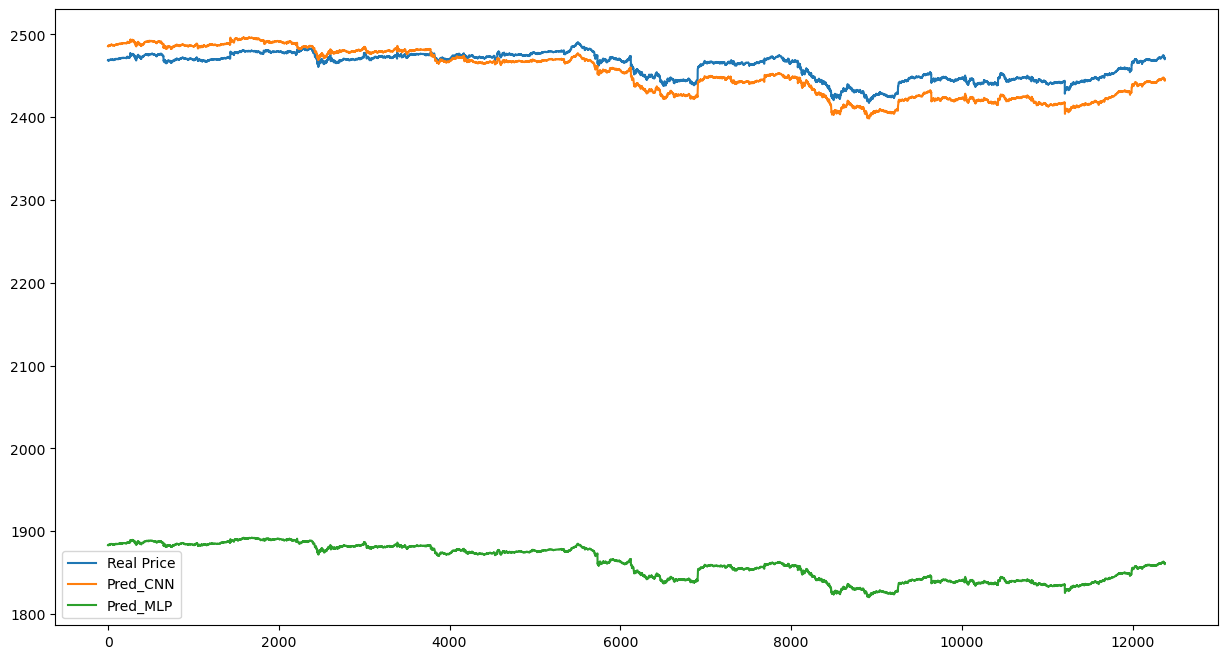

In [51]:
#Plotting the results

results_stock_prediction['Real Price'].plot(legend='Real Price', figsize=(15,8))
results_stock_prediction['Pred_CNN'].plot(legend='Pred_CNN')
results_stock_prediction['Pred_MLP'].plot(legend='Pred_MLP')

From table, we can clearly see that the MLP model was terrible at forecasting stock prices, with a very wide margin of difference when compared to CNN, which managed to capture the overall price forecast that match to the actual prices from the original dataset. The CNN model outperforms the MLP model by a very large difference for this particular task. The errors from the CNN model are considerably smaller, meaning its predictions are more accurate. Graphically, we can see from figure above that there is a very wide difference between MLP forecast and actual prices.

In [52]:
# Computation of the mean absolut error (MAE):

MAE_pred_MLP_stocks = mean_absolute_error(results_stock_prediction['Real Price'], results_stock_prediction['Pred_MLP'])
MAR_pred_CNN_stocks = mean_absolute_error(results_stock_prediction['Real Price'], results_stock_prediction['Pred_CNN'])
print("MAE results obtained for Pred_MLP :", MAE_pred_MLP_stocks)
print("MAE results obtained for Pred_CNN :", MAR_pred_CNN_stocks)


# Computation of the mean squared error (MSE):

MSE_pred_MLP_stocks = mean_squared_error(results_stock_prediction['Real Price'], results_stock_prediction['Pred_MLP'])
MSE_pred_CNN_stocks = mean_squared_error(results_stock_prediction['Real Price'], results_stock_prediction['Pred_CNN'])
print("MSE results obtained for Pred_MLP :", MSE_pred_MLP_stocks)
print("MSE results obtained for Pred_CNN :", MSE_pred_CNN_stocks)

# Computation of the root mean squared error (RMSE):

RMSE_pred_MLP_stocks = np.sqrt(MSE_pred_MLP_stocks)
RMSE_pred_CNN_stocks = np.sqrt(MSE_pred_CNN_stocks)
print("RMSE results obtained for Pred_MLP :", RMSE_pred_MLP_stocks)
print("RMSE results obtained for Pred_CNN :", RMSE_pred_CNN_stocks)

MAE results obtained for Pred_MLP : 599.9852672602294
MAE results obtained for Pred_CNN : 16.424824333507928
MSE results obtained for Pred_MLP : 360050.77425642405
MSE results obtained for Pred_CNN : 320.542927793132
RMSE results obtained for Pred_MLP : 600.0423103885458
RMSE results obtained for Pred_CNN : 17.903712681819155


## 2.3 Implementation of a modified MLP

In [53]:
# MLP with a modified structure

modified_model_MLP = Sequential()
modified_model_MLP.add(Flatten(input_shape = (500,)))
modified_model_MLP.add(Dense(2048, activation='relu'))
modified_model_MLP.add(Dense(512, activation='relu'))
modified_model_MLP.add(Dropout(0.25))
modified_model_MLP.add(Dense(128, activation='relu'))
modified_model_MLP.add(Dense(32, activation='relu'))
modified_model_MLP.add(Dense(8, activation='relu'))
modified_model_MLP.add(Dense(4, activation='relu'))
modified_model_MLP.add(Dense(1))

In [54]:
# Parametrization of the MLP model

modified_model_MLP.compile(loss='mean_squared_error', optimizer='adam')

In [55]:
# Calibration of the MLP with modified epochs (increase of 10 epochs)

modified_model_MLP.fit(X_train, Y_train, epochs=30, batch_size=16)

Epoch 1/30
1806/1806 [==============================] - 37s 20ms/step - loss: 26658.5098
Epoch 2/30
1806/1806 [==============================] - 38s 21ms/step - loss: 7327.5273
Epoch 3/30
1806/1806 [==============================] - 41s 23ms/step - loss: 2901.4121
Epoch 4/30
1806/1806 [==============================] - 32s 18ms/step - loss: 2669.7493
Epoch 5/30
1806/1806 [==============================] - 32s 18ms/step - loss: 2017.7445
Epoch 6/30
1806/1806 [==============================] - 32s 17ms/step - loss: 1631.6459
Epoch 7/30
1806/1806 [==============================] - 30s 17ms/step - loss: 1482.1010
Epoch 8/30
1806/1806 [==============================] - 28s 15ms/step - loss: 1389.7068
Epoch 9/30
1806/1806 [==============================] - 27s 15ms/step - loss: 1339.9814
Epoch 10/30
1806/1806 [==============================] - 28s 15ms/step - loss: 1384.3455
Epoch 11/30
1806/1806 [==============================] - 27s 15ms/step - loss: 836.6024
Epoch 12/30
1806/1806 [=======

In [56]:
modified_price_MLP = modified_model_MLP.predict(X_test)
modified_price_MLP = modified_price_MLP.reshape(1,-1)[0]
modified_price_MLP

387/387 [==============================] - 2s 4ms/step


array([1857.1001, 1857.265 , 1857.3147, ..., 1837.4637, 1836.3923,
       1837.4479], dtype=float32)

<Axes: >

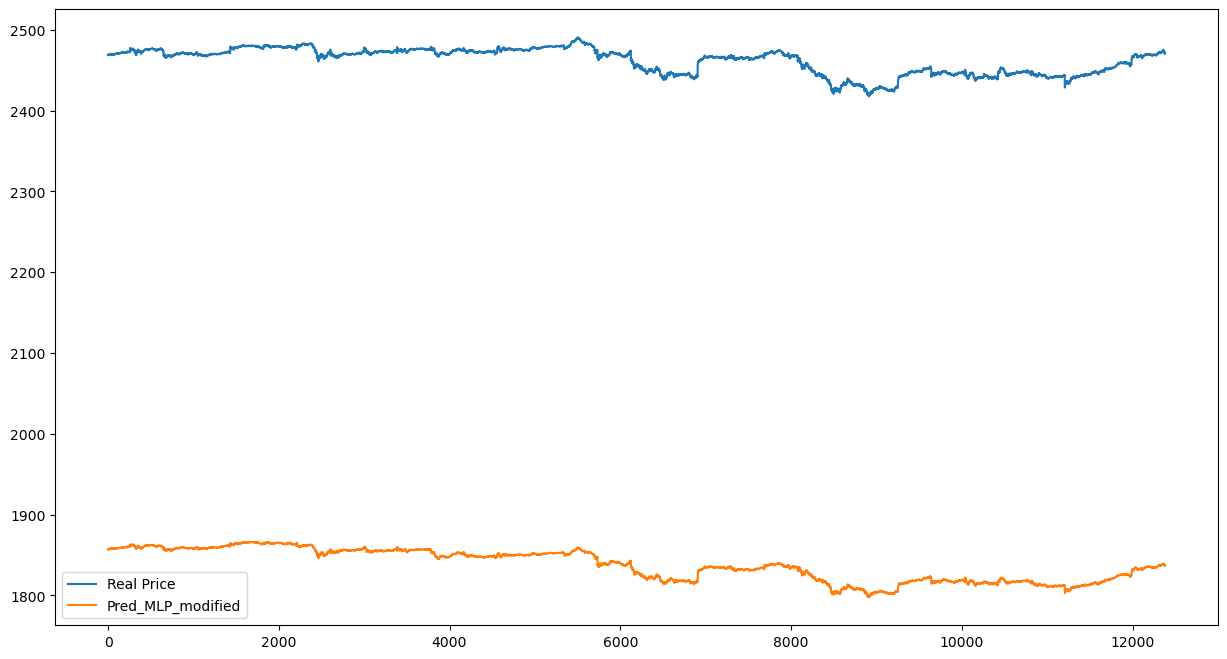

In [57]:
modified_results_stock_prediction = pd.DataFrame({'Real Price': Y_test, 'Pred_MLP_modified':modified_price_MLP})
modified_results_stock_prediction.head(n=5)

modified_results_stock_prediction['Real Price'].plot(legend='Real price S&P500', figsize=(15,8))
modified_results_stock_prediction['Pred_MLP_modified'].plot(legend='Modified prediction MLP')

In order to improve the results of the MLP, we added more epochs in order to see if it would actually enhance the results of the prediction. The idea for increasing the number of epochs would help the modle to train more times and therefore improve the output. Training the MLP for more epochs typically allows the model to learn the data better and would help to achieve better performance. By increasing the number of epochs from 10 to 30, the model has more opportunities to adjust its weights on the training data, potentially lowering the training and validation loss if the model had not yet converged after 10 epochs. However, the risk of increasing the number of epoch is that the model falls in an overfitting of the data and biais the results. If the increase in epoch has decreased RMSE, then we would argue that this approach helped to enhance the model forecasting abilities. If not, then the increase in epoch did not achieve its objective of enhancing the results. Looking at table, the modified MLP, which was trained for 30 epochs as opposed to 10 for the simple MLP, actually shows worse performance across all three metrics. The modified MLP has a slightly higher MAE, inidicating that the average prediction error increased with more epochs. The MSE also increased significantly for the modified MLP, which indicates that the additional epochs may have caused the model to overfit the training data, leading to weaker performance on the test data. Consistent with the MSE, the RMSE is higher for the modified MLP, which again suggests a decline in model performance. Visually, it doesn't show any sign of model improvement overall.

In [73]:
# Computation of the mean absolut error (MAE):

modified_MAE_pred_MLP = mean_absolute_error(results_SP500_prediction['Real_price_SP500'], modified_results_stock_prediction['Pred_MLP_modified'])
print("MAE for the modified Pred_MLP :", modified_MAE_pred_MLP)

# Computation of the mean squared error (MSE):

modified_MSE_pred_MLP = mean_squared_error(results_SP500_prediction['Real_price_SP500'], modified_results_stock_prediction['Pred_MLP_modified'])
print("MSE for the modified Pred_MLP :", modified_MSE_pred_MLP)

# Computation of the root mean squared error (RMSE):

modified_RMSE_pred_MLP = np.sqrt(modified_MSE_pred_MLP)
print("RMSE for the modifed Pred_MLP :", modified_RMSE_pred_MLP)

MAE for the modified Pred_MLP : 624.0527473049873
MSE for the modified Pred_MLP : 389492.994741613
RMSE for the modifed Pred_MLP : 624.0937387457216


# **3. Implementation of alternative machine learning models**

### 3.1 SVM application

Suport Vector Machine (SVM) is a non-parametric machine learning technique that uses the concept of Support Vector Regression (SVR) to address regression problems. The C parameter is set to 1.0, controlling the trade-off between the model's complexity (and accuracy on training data) and the degree to which it generalizes.

In [59]:
# Creation of the SVM model characteristics

model_SVM = SVR(kernel='rbf', C=1.0, gamma='scale')

In [60]:
# Calibration of the random forest model

model_SVM.fit(X_train, Y_train)

SVR()

In [61]:
# Analysis of the price forecasting using the SVM

price_SVM = model_SVM.predict(X_test)
price_SVM

array([2456.78346471, 2456.91735847, 2456.91611358, ..., 2445.95111501,
       2445.64356454, 2446.09601749])

### 3.2 Random Forest application

Random Forest (RF) is a machine learning technique that works by building many decision trees during training and then showing the average forecast of all the trees. When using individual decision trees, especially for regression tasks, the risk of overfitting is higher. The ensemble method lowers this risk. In our project, it is created with 50 trees (n\_estimators) in the forest. The random\_state ensures that the results are reproducible.

In [62]:
# Creation of the RF model characteristics

model_rdmforest = RandomForestRegressor(n_estimators=50, random_state=42)

In [63]:
# Calibration of the random forest model

model_rdmforest.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=50, random_state=42)

In [64]:
# Analysis of the price forecasting using the random forest

price_rdmforest = model_rdmforest.predict(X_test)
price_rdmforest

array([2468.370998, 2468.298014, 2468.285212, ..., 2463.407584,
       2463.407584, 2463.407584])

### 3.3 Gradient Boosting

Gradient Boosting (GB) creates an additive model one step at a time, and it can be used to improve any differentiable loss function. It is done by fitting a regression tree to the negative gradient of the given loss function at each stage. This lowers the residuals of the earlier models. The boosting method focuses on areas where the old models don't do well by adding weak learners one at a time. In our project, the model uses 50 trees with a learning rate of 0.1 and a maximum depth of 3 for each tree.

In [65]:
model_gboosting = GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, max_depth=3, random_state=42)

In [66]:
# Calibration of the gradient boosting model
model_gboosting.fit(X_train, Y_train)

GradientBoostingRegressor(n_estimators=50, random_state=42)

In [67]:
# Analysis of the price forecasting using the gradient boosting
price_gboosting = model_gboosting.predict(X_test)
price_gboosting

array([2464.49987999, 2464.49987999, 2464.49987999, ..., 2437.55426905,
       2437.55426905, 2437.55426905])

### 3.4 Consolidation of the estimations of the S&P500 and comparison of the predictions

In [68]:
results_stock_prediction_alternative = pd.DataFrame({'Pred_SVM': price_SVM , 'Pred_gboosting': price_gboosting, 'Pred_rdmforest': price_rdmforest})
results_stock_prediction_alternative.head(n=5)
results_stock_prediction_alternative.head(n=5)

,Pred_SVM,Pred_gboosting,Pred_rdmforest
0,2456.783465,2464.499880,2468.370998
1,2456.917358,2464.499880,2468.298014
2,2456.916114,2464.499880,2468.285212
3,2456.797124,2464.499880,2467.317410
4,2456.774126,2464.783858,2467.206406


<Axes: >

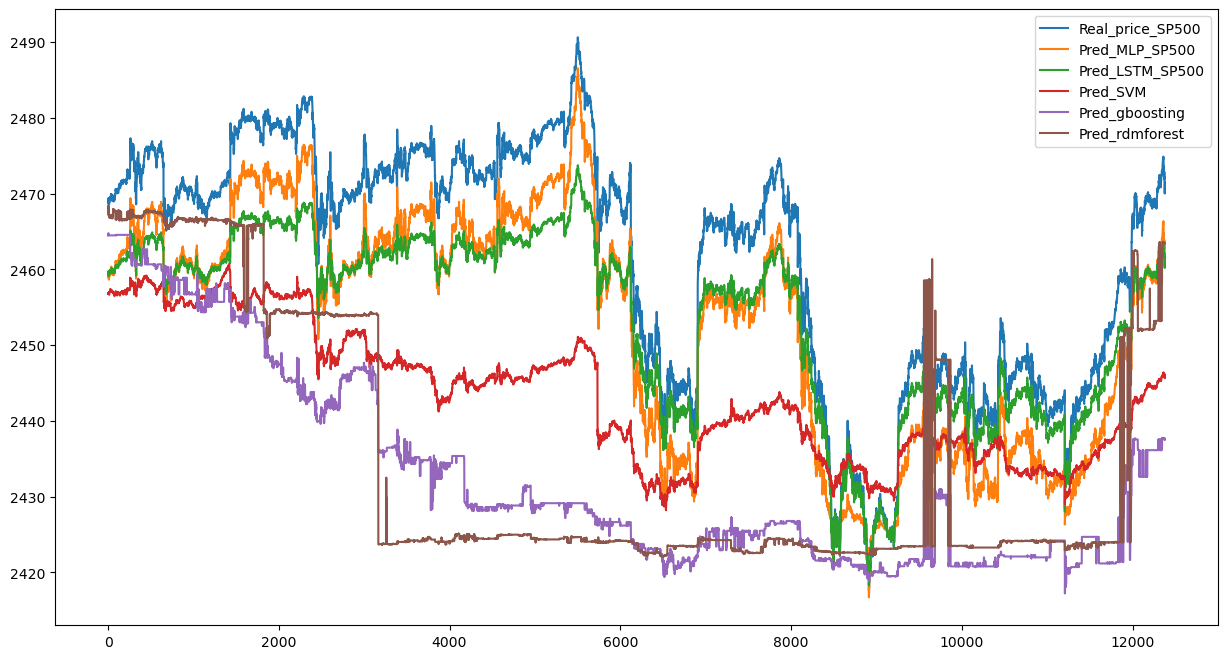

In [69]:
# Plot the consolidated forecasting results against the benchmark S&P500 index

results_SP500_prediction['Real_price_SP500'].plot(legend='Real price S&P500', figsize=(15,8))
results_SP500_prediction['Pred_MLP_SP500'].plot(legend='Forecast MLP')
results_SP500_prediction['Pred_LSTM_SP500'].plot(legend='Forecast LSTM')
results_stock_prediction_alternative['Pred_SVM'].plot(legend='Forecast SVM')
results_stock_prediction_alternative['Pred_gboosting'].plot(legend='Forecast XGBoost')
results_stock_prediction_alternative['Pred_rdmforest'].plot(legend='Forecast Random Forest')

We implement three different models to test forecasting of S&P500 price data, namely Suport Vec-
tor Machine (SVM), Gradient Boosting and Random Forest, and compare the five machine learning
techniques implemented to forecast stock index price.

* The Multilayer Perceptron (MLP) and Long Short-Term Memory (LSTM) models made the most accurate predictions of S\&P 500 prices. This shows that these models did a good job of finding the trends in the time-series data. LSTM did better than the MLP and than the whole sample of machine learning techniques with the lowest MAE, MSE, and RMSE numbers One explanation that could promote the performance of LSTM is its ability to capture long-term relationships and sequences in the data, which is common in financial time series like stock prices.\newline

* The Support Vector Machine (SVM) with an RBF kernel has worse error rates than the MLP and LSTM. Although SVMs are great for classification and can also be used for regression (SVR), the kernel (C and gamma) have a big effect on how well they work.\newline

* Lastly, the Gradient Boosting and Random Forest models have the most important errors and deviate the most from actual prices. Even though robust and powerful techniques like GB and RF can deal with non-linear relationships, they may not have worked as well here because they were overfitted or because the S\&P 500 price movements are not predictable and don't follow clear trends.\newline

In [70]:
# Computation of the mean absolut error (MAE):

MAE_pred_MLP_SP500 = mean_absolute_error(results_SP500_prediction['Real_price_SP500'], results_SP500_prediction['Pred_MLP_SP500'])
MAE_pred_LSTM_SP500 = mean_absolute_error(results_SP500_prediction['Real_price_SP500'], results_SP500_prediction['Pred_LSTM_SP500'])
MAE_pred_SVM_SP500 = mean_absolute_error(results_SP500_prediction['Real_price_SP500'], results_stock_prediction_alternative['Pred_SVM'])
MAE_pred_gboosting_SP500 = mean_absolute_error(results_SP500_prediction['Real_price_SP500'], results_stock_prediction_alternative['Pred_gboosting'])
MAE_pred_rdmforest_SP500 = mean_absolute_error(results_SP500_prediction['Real_price_SP500'], results_stock_prediction_alternative['Pred_rdmforest'])

print("MAE obtained for the forecasted MLP model:", MAE_pred_MLP_SP500)
print("MAE obtained for the forecasted LSTM model:", MAE_pred_LSTM_SP500)
print("MAE obtained for the forecasted SVM model:", MAE_pred_SVM_SP500)
print("MAE obtained for the forecasted Gradient Boosting model:", MAE_pred_gboosting_SP500)
print("MAE obtained for the forecasted Random Forest model:", MAE_pred_rdmforest_SP500)

# Computation of the mean squared error (MSE):

MSE_pred_MLP_SP500 = mean_squared_error(results_SP500_prediction['Real_price_SP500'], results_SP500_prediction['Pred_MLP_SP500'])
MSE_pred_LSTM_SP500 = mean_squared_error(results_SP500_prediction['Real_price_SP500'], results_SP500_prediction['Pred_LSTM_SP500'])
MSE_pred_SVM_SP500 = mean_squared_error(results_SP500_prediction['Real_price_SP500'], results_stock_prediction_alternative['Pred_SVM'])
MSE_pred_gboosting_SP500 = mean_squared_error(results_SP500_prediction['Real_price_SP500'], results_stock_prediction_alternative['Pred_gboosting'])
MSE_pred_rdmforest_SP500 = mean_squared_error(results_SP500_prediction['Real_price_SP500'], results_stock_prediction_alternative['Pred_rdmforest'])

print("MSE obtained for the forecasted MLP model:", MSE_pred_MLP_SP500)
print("MSE obtained for the forecasted LSTM model:", MSE_pred_LSTM_SP500)
print("MSE obtained for the forecasted SVM model:", MSE_pred_SVM_SP500)
print("MSE obtained for the forecasted Gradient Boosting model:", MSE_pred_gboosting_SP500)
print("MSE obtained for the forecasted Random Forest model:", MSE_pred_rdmforest_SP500)

# Computation of the root mean squared error (RMSE):

RMSE_pred_MLP_SP500 = np.sqrt(MSE_pred_MLP_SP500)
RMSE_pred_LSTM_SP500 = np.sqrt(MSE_pred_LSTM_SP500)
RMSE_pred_SVM_SP500 = np.sqrt(MSE_pred_SVM_SP500)
RMSE_pred_gboosting_SP500 = np.sqrt(MSE_pred_gboosting_SP500)
RMSE_pred_rdmforest_SP500 = np.sqrt(MSE_pred_rdmforest_SP500)
print("RMSE obtained for the forecasted MLP model:", RMSE_pred_MLP_SP500)
print("RMSE obtained for the forecasted LSTM model:", RMSE_pred_LSTM_SP500)
print("RMSE obtained for the forecasted SVM model:", RMSE_pred_SVM_SP500)
print("RMSE obtained for the forecasted Gradient Boosting model:", RMSE_pred_gboosting_SP500)
print("RMSE obtained for the forecasted Random Forest model:", RMSE_pred_rdmforest_SP500)

MAE obtained for the forecasted MLP model: 8.710551679845265
MAE obtained for the forecasted LSTM model: 7.884710131859602
MAE obtained for the forecasted SVM model: 18.9365323651065
MAE obtained for the forecasted Gradient Boosting model: 28.897709285362343
MAE obtained for the forecasted Random Forest model: 26.77231424087242
MSE obtained for the forecasted MLP model: 79.89175192062332
MSE obtained for the forecasted LSTM model: 78.40902288675687
MSE obtained for the forecasted SVM model: 437.2680296257474
MSE obtained for the forecasted Gradient Boosting model: 1000.9597950487582
MSE obtained for the forecasted Random Forest model: 1017.4265342341013
RMSE obtained for the forecasted MLP model: 8.938218610026459
RMSE obtained for the forecasted LSTM model: 8.854886949405785
RMSE obtained for the forecasted SVM model: 20.910954775565543
RMSE obtained for the forecasted Gradient Boosting model: 31.63794865424682
RMSE obtained for the forecasted Random Forest model: 31.897124231411542
